In [1]:
import traceback
from obspy import read_events
import pandas as pd
from datetime import datetime
import pandas as pd

In [2]:
csv_file = "filtered_phase_picks_feb_6_7.csv"

def get_nth_entry(file_path, n):
    try:
        df = pd.read_csv(file_path)
        if n < 0 or n >= len(df):
            raise IndexError(f"Index {n} is out of range. The file contains {len(df)} rows.")
        nth_entry = df.iloc[n]
        return nth_entry
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [3]:
n = 1 
entry = get_nth_entry(csv_file, n)

if entry is not None:
    print(f"Entry {n}:\n{entry}")

Error: File filtered_phase_picks_feb_6_7.csv not found.


In [4]:
csv_file = "filtered_phase_picks_feb_6_7.csv"

def entry_to_wfs_path(csv_file, n):

    entry = get_nth_entry(csv_file, n)

    start_time = datetime.strptime(entry["start_time"], "%Y-%m-%d %H:%M:%S")
    
    start_day = start_time.day
    start_hour = start_time.hour
    

    station_code = entry.station_code
    # For now just get N component
    path = f"0{start_day}/{start_hour:02d}/{station_code}_202302{start_day:02d}_{start_hour:02d}00_100_B_KO_N.GCF"
    return path


In [5]:
from obspy import read

In [6]:
file_path = entry_to_wfs_path(csv_file, 1) 
stream = read(file_path)
stream.filter("bandpass", freqmin=2.0, freqmax=15.0)


Error: File filtered_phase_picks_feb_6_7.csv not found.


TypeError: 'NoneType' object is not subscriptable

In [7]:
stream.plot()

NameError: name 'stream' is not defined

In [8]:
from obspy import read
from obspy.core.utcdatetime import UTCDateTime

stream = read(file_path)

start_time = UTCDateTime(entry.start_time) 
end_time = UTCDateTime(entry.end_time) 

trimmed_stream = stream.trim(starttime=start_time, endtime=end_time)

trimmed_stream.plot()


NameError: name 'file_path' is not defined

In [9]:
from obspy import read
from obspy.core.utcdatetime import UTCDateTime

def display_wfs_10_before_60_after(csv_file, n):
    file_path = entry_to_wfs_path(csv_file, n) 
    stream = read(file_path)
    
    entry = get_nth_entry(csv_file, n)

    #start_time = UTCDateTime(entry.start_time) - 10
    #end_time = start_time + 60
    start_time = UTCDateTime(entry.start_time)
    end_time = UTCDateTime(entry.end_time)
    trimmed_stream = stream.trim(starttime=start_time, endtime=end_time)
    
    trimmed_stream.plot()
    

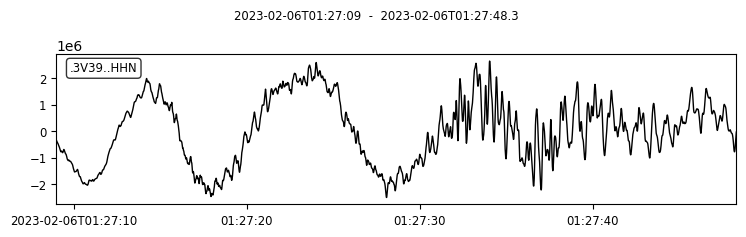

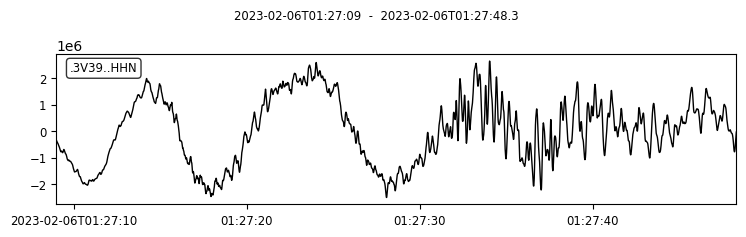

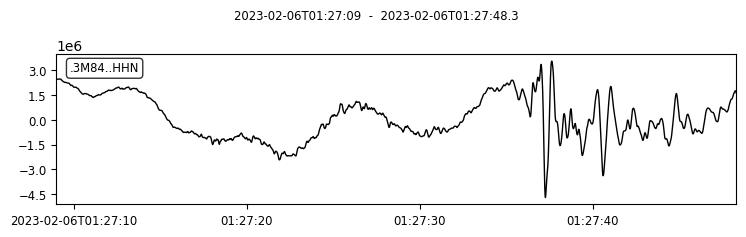

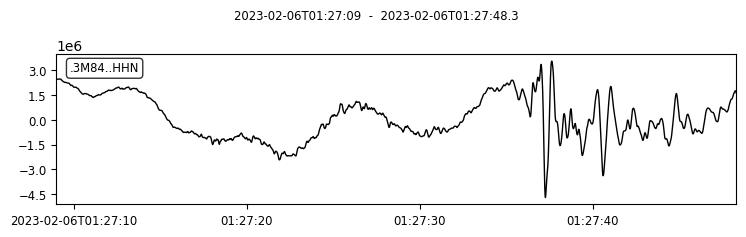

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

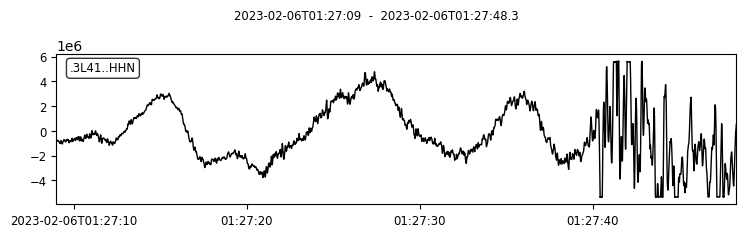

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

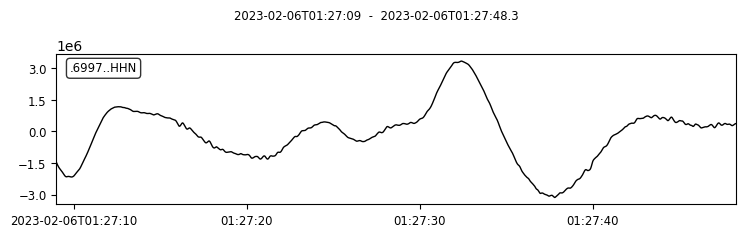

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

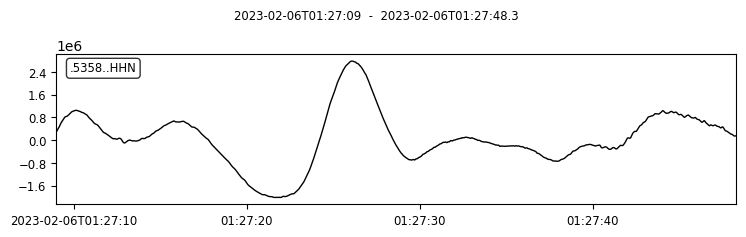

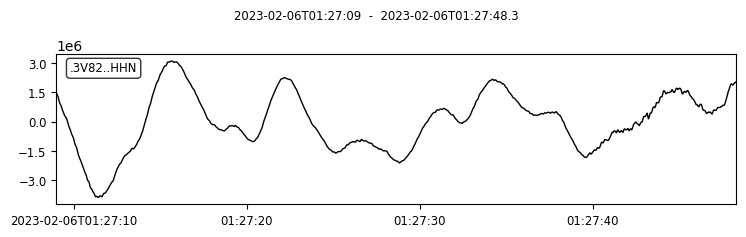

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

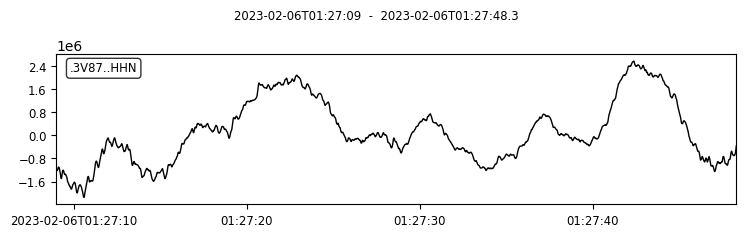

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

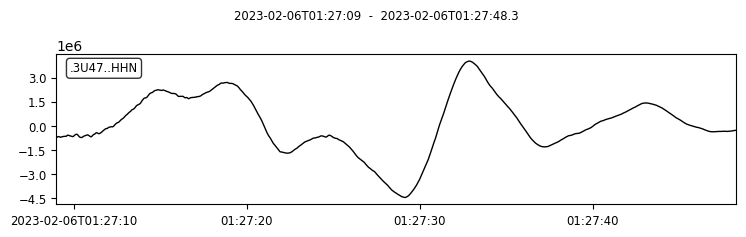

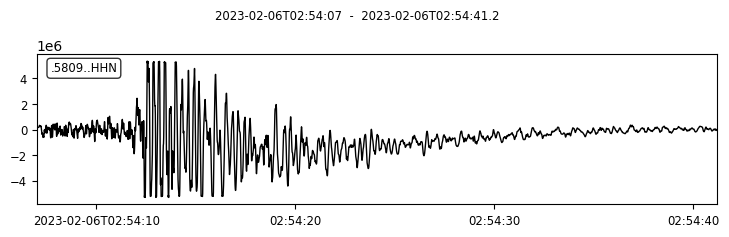

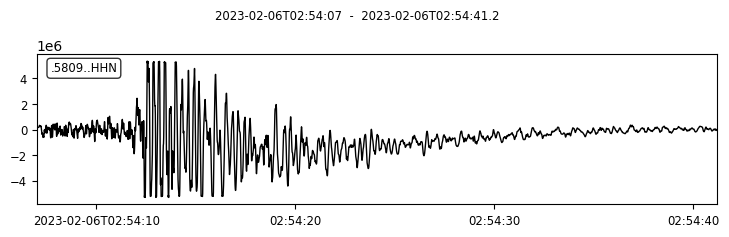

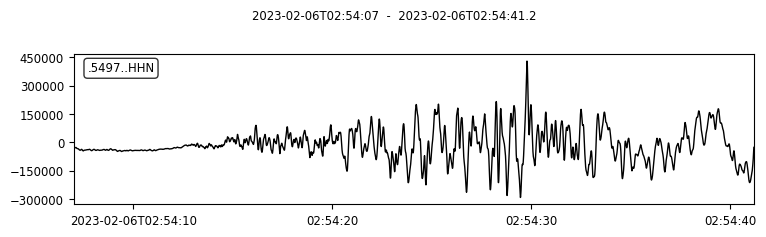

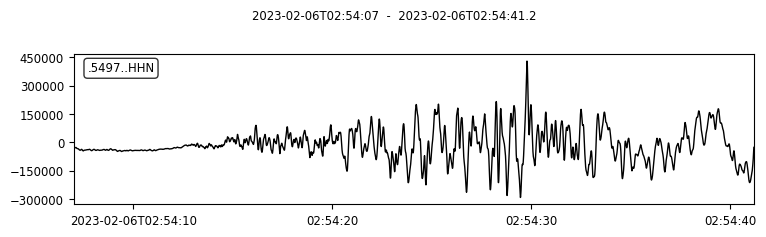

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

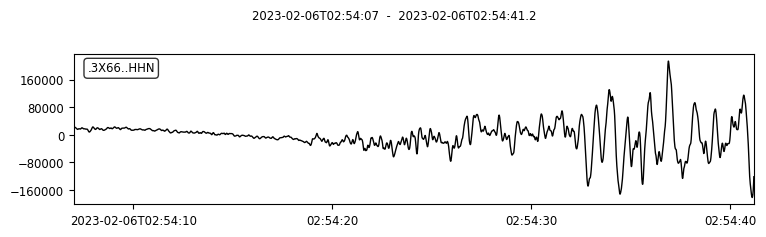

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

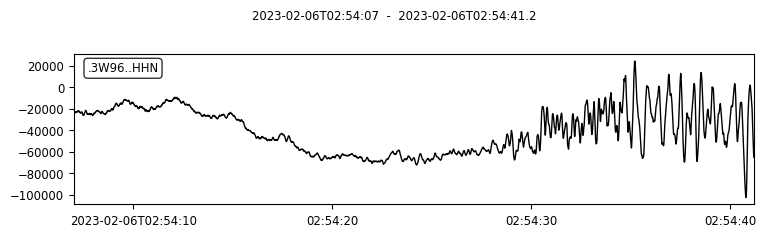

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

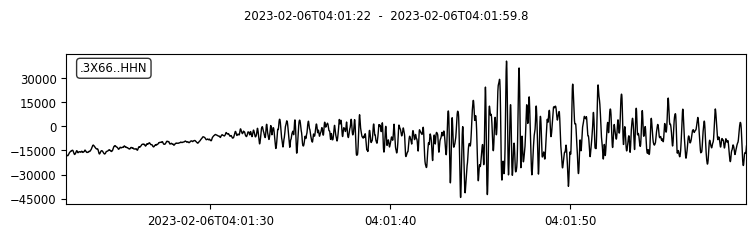

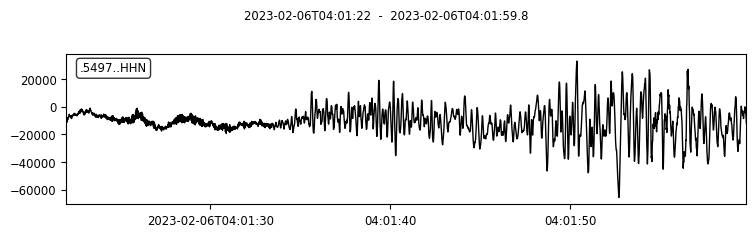

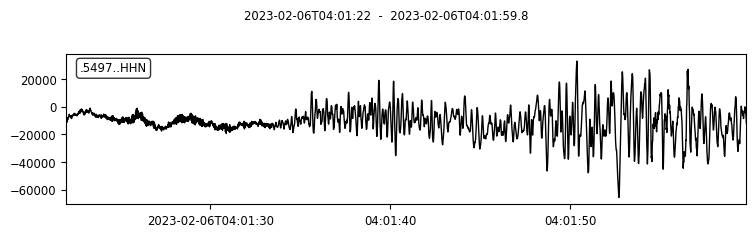

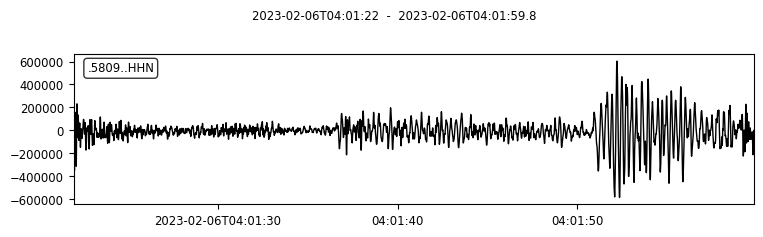

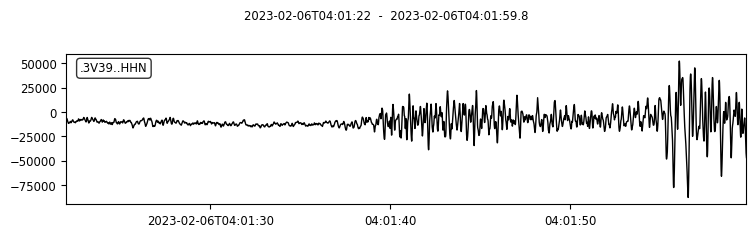

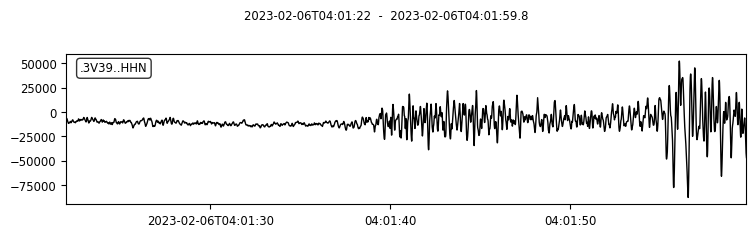

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

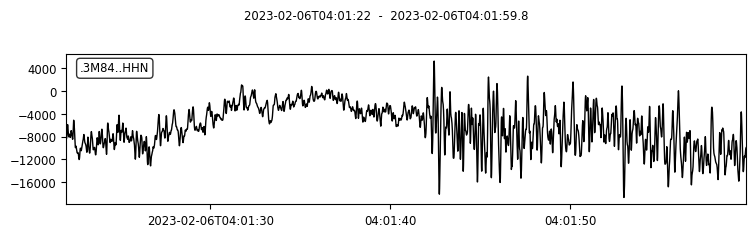

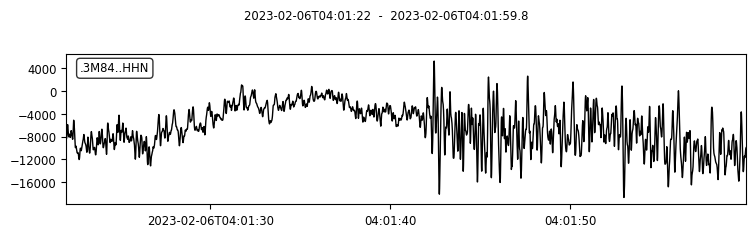

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

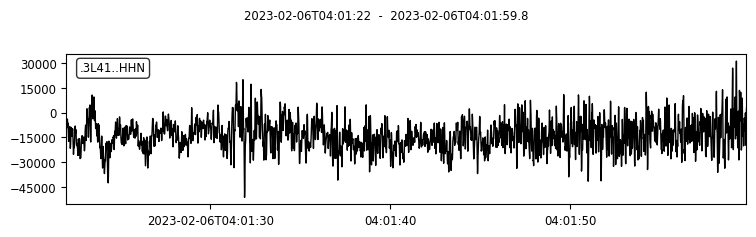

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

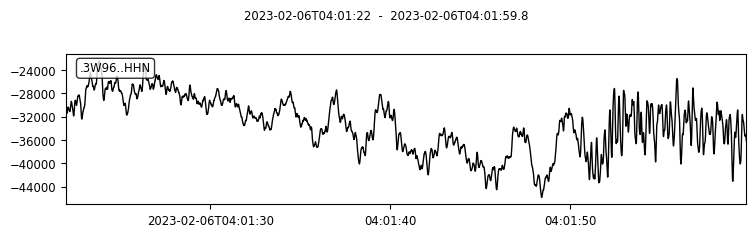

Traceback (most recent call last):
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1042148444.py", line 6, in <module>
    display_wfs_10_before_60_after(csv_file, n)
  File "/var/folders/xl/mv5nyxfs0336bzlgkdt6fk_m0000gn/T/ipykernel_70210/1561677060.py", line 6, in display_wfs_10_before_60_after
    stream = read(file_path)
             ^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/util/decorator.py", line 297, in _map_example_filename
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/boraykasap/Desktop/VAE_Project/venv/lib/python3.11/site-packages/obspy/core/stream.py", line 208, in read
    st = _generic_reader(pathname_or_url, _read, **kwargs)
         ^^^^^^^^^^

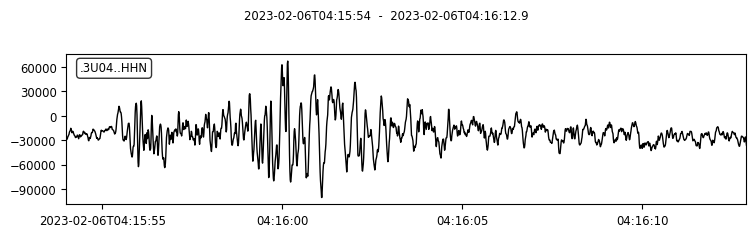

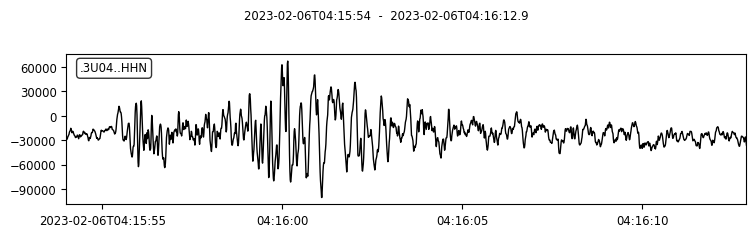

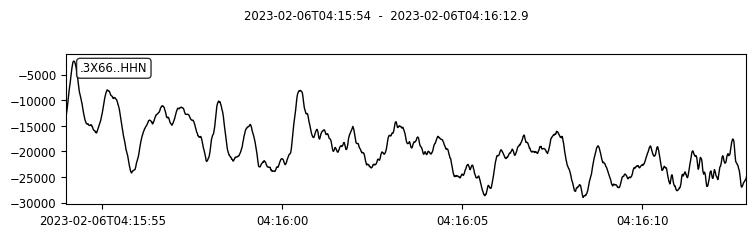

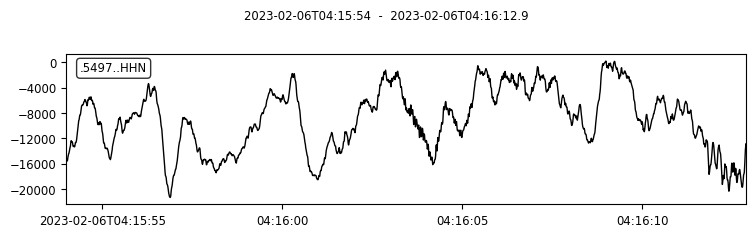

In [11]:
n = 1
csv_file = "filtered_phase_picks_feb_6_7.csv"
counter = 0
while counter < 30:
    try:
        display_wfs_10_before_60_after(csv_file, n)
        n += 1
        counter += 1
    except:
        n += 1
        print(traceback.format_exc())
        print("error")